In [2]:
#needs version >= 1.5 for full functionality
import tequila as tq

In [3]:
#Initialize molecule
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 1.12\nH 0.0 0.0 -1.12\nH 1.12 0.0 0.0\nCl 0.0 1.78 0.0"
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ")
print(molecule)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pVDZ         
geometry        : C 0.0 0.0 0.0
H 0.0 0.0 1.12
H 0.0 0.0 -1.12
H 1.12 0.0 0.0
Cl 0.0 1.78 0.0 
description     :                 
multiplicity    : 1               
charge          : 0               
name            : clch3           
frozen_core     : True            
n_qubits        : 82              
reference state : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Basis

IntegralManager:
ActiveSpace:
Active Space Data:
active_orbitals : [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46] 
reference_orbitals : [0, 1, 2, 3, 4, 5, 6, 7, 

In [4]:
#Molecular Orbitals and Point Groups
molecule.orbitals[3]

OrbitalData(irrep="A'", idx_irrep=7, idx_total=9, idx=3, energy=-0.5672820000582292, occ=None, pair=None)

In [5]:
#Since the Hamiltonian of CH3Cl is extremely large, let's Set Active Space
import tequila as tq
import numpy
active_orbitals = {"A'":[0,1,2], 'A"':[0,1,2]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 27 terms
-497.3714+0.6058Z(0)+0.0000Y(0)Z(1)Y(2)+0.0000X(0)Z(1)X(2)+0.6058Z(1)+0.0000Y(1)Z(2)Y(3)+0.0000X(1)Z(2)X(3)+0.4728Z(2)+0.4728Z(3)+0.1234Z(0)Z(1)-0.0159Y(0)Y(2)-0.0159X(0)X(2)-0.0159Z(0)Y(1)Z(2)Y(3)-0.0159Z(0)X(1)Z(2)X(3)+0.0119Y(0)X(1)X(2)Y(3)-0.0119Y(0)Y(1)X(2)X(3)-0.0119X(0)X(1)Y(2)Y(3)+0.0119X(0)Y(1)Y(2)X(3)+0.0641Z(0)Z(2)+0.0760Z(0)Z(3)+0.0159Y(0)Z(1)Y(2)Z(3)+0.0159X(0)Z(1)X(2)Z(3)+0.0760Z(1)Z(2)+0.0159Y(1)Y(3)+0.0159X(1)X(3)+0.0641Z(1)Z(3)+0.1202Z(2)Z(3)
[-499.00488924 -498.57997097 -498.57997097 -498.320194   -498.320194
 -497.73202913 -497.63875987 -497.63875987 -497.63875987 -497.50643421
 -497.12142031 -496.42884762 -496.42884762 -496.15659917 -496.15659917
 -494.69017105]
lowest energy =  -499.00488924080213


In [6]:
#Let's Set even larger Active Space
import tequila as tq
import numpy
active_orbitals = {"A'":[0,1,2,3], 'A"':[0,1,2,3]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 118 terms
-497.5473+0.4720Z(0)+0.0101Y(0)Z(1)Y(2)+0.0101X(0)Z(1)X(2)-0.0264Y(0)Z(1)Z(2)Z(3)Y(4)-0.0264X(0)Z(1)Z(2)Z(3)X(4)+0.4720Z(1)+0.0101Y(1)Z(2)Y(3)+0.0101X(1)Z(2)X(3)-0.0264Y(1)Z(2)Z(3)Z(4)Y(5)-0.0264X(1)Z(2)Z(3)Z(4)X(5)+0.3697Z(2)-0.0022Y(2)Z(3)Y(4)-0.0022X(2)Z(3)X(4)+0.3697Z(3)-0.0022Y(3)Z(4)Y(5)-0.0022X(3)Z(4)X(5)+0.0550Z(4)+0.0550Z(5)+0.1234Z(0)Z(1)-0.0159Y(0)Y(2)-0.0159X(0)X(2)-0.0162Y(0)Z(2)Z(3)Y(4)-0.0162X(0)Z(2)Z(3)X(4)-0.0159Z(0)Y(1)Z(2)Y(3)-0.0159Z(0)X(1)Z(2)X(3)+0.0119Y(0)X(1)X(2)Y(3)-0.0119Y(0)Y(1)X(2)X(3)-0.0119X(0)X(1)Y(2)Y(3)+0.0119X(0)Y(1)Y(2)X(3)-0.0033Y(0)X(1)X(3)Y(4)-0.0033Y(0)Y(1)Y(3)Y(4)-0.0033X(0)X(1)X(3)X(4)-0.0033X(0)Y(1)Y(3)X(4)-0.0162Z(0)Y(1)Z(2)Z(3)Z(4)Y(5)-0.0162Z(0)X(1)Z(2)Z(3)Z(4)X(5)+0.0033Y(0)X(1)X(2)Z(3)Z(4)Y(5)-0.0033Y(0)Y(1)X(2)Z(3)Z(4)X(5)-0.0033X(0)X(1)Y(2)Z(3)Z(4)Y(5)+0.0033X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0074Y(0)X(1)X(4)Y(5)-0.0074Y(0)Y(1)X(4)X(5)-0.0074X(0)X(1)Y(4)Y(5)+0.0074X(0)Y(1)Y(4)X(5)+0.0641Z(0)Z(2)-0.0008Z(0)Y(2)Z(3)Y(4)-0

In [7]:
#Let's Set even larger Active Space
import tequila as tq
import numpy
active_orbitals = {"A'":[0,1,2,3,4], 'A"':[0,1,2,3]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 118 terms
-497.5473+0.4720Z(0)+0.0101Y(0)Z(1)Y(2)+0.0101X(0)Z(1)X(2)-0.0264Y(0)Z(1)Z(2)Z(3)Y(4)-0.0264X(0)Z(1)Z(2)Z(3)X(4)+0.4720Z(1)+0.0101Y(1)Z(2)Y(3)+0.0101X(1)Z(2)X(3)-0.0264Y(1)Z(2)Z(3)Z(4)Y(5)-0.0264X(1)Z(2)Z(3)Z(4)X(5)+0.3697Z(2)-0.0022Y(2)Z(3)Y(4)-0.0022X(2)Z(3)X(4)+0.3697Z(3)-0.0022Y(3)Z(4)Y(5)-0.0022X(3)Z(4)X(5)+0.0550Z(4)+0.0550Z(5)+0.1234Z(0)Z(1)-0.0159Y(0)Y(2)-0.0159X(0)X(2)-0.0162Y(0)Z(2)Z(3)Y(4)-0.0162X(0)Z(2)Z(3)X(4)-0.0159Z(0)Y(1)Z(2)Y(3)-0.0159Z(0)X(1)Z(2)X(3)+0.0119Y(0)X(1)X(2)Y(3)-0.0119Y(0)Y(1)X(2)X(3)-0.0119X(0)X(1)Y(2)Y(3)+0.0119X(0)Y(1)Y(2)X(3)-0.0033Y(0)X(1)X(3)Y(4)-0.0033Y(0)Y(1)Y(3)Y(4)-0.0033X(0)X(1)X(3)X(4)-0.0033X(0)Y(1)Y(3)X(4)-0.0162Z(0)Y(1)Z(2)Z(3)Z(4)Y(5)-0.0162Z(0)X(1)Z(2)Z(3)Z(4)X(5)+0.0033Y(0)X(1)X(2)Z(3)Z(4)Y(5)-0.0033Y(0)Y(1)X(2)Z(3)Z(4)X(5)-0.0033X(0)X(1)Y(2)Z(3)Z(4)Y(5)+0.0033X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0074Y(0)X(1)X(4)Y(5)-0.0074Y(0)Y(1)X(4)X(5)-0.0074X(0)X(1)Y(4)Y(5)+0.0074X(0)Y(1)Y(4)X(5)+0.0641Z(0)Z(2)-0.0008Z(0)Y(2)Z(3)Y(4)-0

In [8]:
#Let's Set even larger Active Space
import tequila as tq
import numpy
active_orbitals = {"A'":[0,1,2,3,4], 'A"':[0,1,2,3,4]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 361 terms
-497.1323+0.3313Z(0)-0.0040Y(0)Z(1)Y(2)-0.0040X(0)Z(1)X(2)-0.0158Y(0)Z(1)Z(2)Z(3)Y(4)-0.0158X(0)Z(1)Z(2)Z(3)X(4)-0.0039Y(0)Z(1)Z(2)Z(3)Z(4)Z(5)Y(6)-0.0039X(0)Z(1)Z(2)Z(3)Z(4)Z(5)X(6)+0.3313Z(1)-0.0040Y(1)Z(2)Y(3)-0.0040X(1)Z(2)X(3)-0.0158Y(1)Z(2)Z(3)Z(4)Y(5)-0.0158X(1)Z(2)Z(3)Z(4)X(5)-0.0039Y(1)Z(2)Z(3)Z(4)Z(5)Z(6)Y(7)-0.0039X(1)Z(2)Z(3)Z(4)Z(5)Z(6)X(7)+0.1946Z(2)-0.0030Y(2)Z(3)Y(4)-0.0030X(2)Z(3)X(4)-0.0219Y(2)Z(3)Z(4)Z(5)Y(6)-0.0219X(2)Z(3)Z(4)Z(5)X(6)+0.1946Z(3)-0.0030Y(3)Z(4)Y(5)-0.0030X(3)Z(4)X(5)-0.0219Y(3)Z(4)Z(5)Z(6)Y(7)-0.0219X(3)Z(4)Z(5)Z(6)X(7)-0.0465Z(4)-0.0045Y(4)Z(5)Y(6)-0.0045X(4)Z(5)X(6)-0.0465Z(5)-0.0045Y(5)Z(6)Y(7)-0.0045X(5)Z(6)X(7)-0.2492Z(6)-0.2492Z(7)+0.1234Z(0)Z(1)-0.0159Y(0)Y(2)-0.0159X(0)X(2)-0.0162Y(0)Z(2)Z(3)Y(4)-0.0162X(0)Z(2)Z(3)X(4)-0.0073Y(0)Z(2)Z(3)Z(4)Z(5)Y(6)-0.0073X(0)Z(2)Z(3)Z(4)Z(5)X(6)-0.0159Z(0)Y(1)Z(2)Y(3)-0.0159Z(0)X(1)Z(2)X(3)+0.0119Y(0)X(1)X(2)Y(3)-0.0119Y(0)Y(1)X(2)X(3)-0.0119X(0)X(1)Y(2)Y(3)+0.0119X(0)Y(1)Y(2)X(3)-0

In [9]:
#Let's Set even larger Active Space
import tequila as tq
import numpy
active_orbitals = {"A'":[0,1,2,3,4,5], 'A"':[0,1,2,3,4]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 492 terms
-495.6951+0.7801Z(0)+0.7801Z(1)+0.5092Z(2)+0.0048Y(2)Z(3)Y(4)+0.0048X(2)Z(3)X(4)-0.0385Y(2)Z(3)Z(4)Z(5)Y(6)-0.0385X(2)Z(3)Z(4)Z(5)X(6)-0.0030Y(2)Z(3)Z(4)Z(5)Z(6)Z(7)Y(8)-0.0030X(2)Z(3)Z(4)Z(5)Z(6)Z(7)X(8)+0.5092Z(3)+0.0048Y(3)Z(4)Y(5)+0.0048X(3)Z(4)X(5)-0.0385Y(3)Z(4)Z(5)Z(6)Y(7)-0.0385X(3)Z(4)Z(5)Z(6)X(7)-0.0030Y(3)Z(4)Z(5)Z(6)Z(7)Z(8)Y(9)-0.0030X(3)Z(4)Z(5)Z(6)Z(7)Z(8)X(9)+0.3953Z(4)-0.0034Y(4)Z(5)Y(6)-0.0034X(4)Z(5)X(6)-0.0626Y(4)Z(5)Z(6)Z(7)Y(8)-0.0626X(4)Z(5)Z(6)Z(7)X(8)+0.3953Z(5)-0.0034Y(5)Z(6)Y(7)-0.0034X(5)Z(6)X(7)-0.0626Y(5)Z(6)Z(7)Z(8)Y(9)-0.0626X(5)Z(6)Z(7)Z(8)X(9)+0.0696Z(6)-0.0044Y(6)Z(7)Y(8)-0.0044X(6)Z(7)X(8)+0.0696Z(7)-0.0044Y(7)Z(8)Y(9)-0.0044X(7)Z(8)X(9)-0.0717Z(8)-0.0717Z(9)+0.1230Z(0)Z(1)+0.0135Y(0)X(1)X(2)Y(3)-0.0135Y(0)Y(1)X(2)X(3)-0.0135X(0)X(1)Y(2)Y(3)+0.0135X(0)Y(1)Y(2)X(3)+0.0046Y(0)X(1)X(3)Y(4)+0.0046Y(0)Y(1)Y(3)Y(4)+0.0046X(0)X(1)X(3)X(4)+0.0046X(0)Y(1)Y(3)X(4)-0.0032Y(0)X(1)X(3)Z(4)Z(5)Y(6)-0.0032Y(0)Y(1)Y(3)Z(4)Z(5)Y(6)-0.0032X(0

In [10]:
#Let's Set even larger Active Space
import tequila as tq
import numpy
active_orbitals = {"A'":[0,1,2,3,4,5], 'A"':[0,1,2,3,4,5]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 1079 terms
-495.3220+0.5749Z(0)+0.5749Z(1)+0.3373Z(2)-0.0051Y(2)Z(3)Y(4)-0.0051X(2)Z(3)X(4)-0.0216Y(2)Z(3)Z(4)Z(5)Y(6)-0.0216X(2)Z(3)Z(4)Z(5)X(6)-0.0034Y(2)Z(3)Z(4)Z(5)Z(6)Z(7)Y(8)-0.0034X(2)Z(3)Z(4)Z(5)Z(6)Z(7)X(8)-0.0218Y(2)Z(3)Z(4)Z(5)Z(6)Z(7)Z(8)Z(9)Y(10)-0.0218X(2)Z(3)Z(4)Z(5)Z(6)Z(7)Z(8)Z(9)X(10)+0.3373Z(3)-0.0051Y(3)Z(4)Y(5)-0.0051X(3)Z(4)X(5)-0.0216Y(3)Z(4)Z(5)Z(6)Y(7)-0.0216X(3)Z(4)Z(5)Z(6)X(7)-0.0034Y(3)Z(4)Z(5)Z(6)Z(7)Z(8)Y(9)-0.0034X(3)Z(4)Z(5)Z(6)Z(7)Z(8)X(9)-0.0218Y(3)Z(4)Z(5)Z(6)Z(7)Z(8)Z(9)Z(10)Y(11)-0.0218X(3)Z(4)Z(5)Z(6)Z(7)Z(8)Z(9)Z(10)X(11)+0.2011Z(4)-0.0032Y(4)Z(5)Y(6)-0.0032X(4)Z(5)X(6)-0.0308Y(4)Z(5)Z(6)Z(7)Y(8)-0.0308X(4)Z(5)Z(6)Z(7)X(8)+0.0083Y(4)Z(5)Z(6)Z(7)Z(8)Z(9)Y(10)+0.0083X(4)Z(5)Z(6)Z(7)Z(8)Z(9)X(10)+0.2011Z(5)-0.0032Y(5)Z(6)Y(7)-0.0032X(5)Z(6)X(7)-0.0308Y(5)Z(6)Z(7)Z(8)Y(9)-0.0308X(5)Z(6)Z(7)Z(8)X(9)+0.0083Y(5)Z(6)Z(7)Z(8)Z(9)Z(10)Y(11)+0.0083X(5)Z(6)Z(7)Z(8)Z(9)Z(10)X(11)-0.0450Z(6)-0.0044Y(6)Z(7)Y(8)-0.0044X(6)Z(7)X(8)-0.0116Y(6)Z(7)Z(

In [3]:
#Excited state calculations with VQE
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 {R}\nH 0.0 0.0 -{R}\nH {R} 0.0 0.0\nCl 0.0 1.78 0.0"
fci_gs = []
fci_es = []
energies_gs = []
energies_es = []
P0 = tq.paulis.Projector("|00>")
for R in [0.3 + 0.1*i for i in range(25)]:
    print("Optimizing point R={:2.1f}".format(R))
    active = {"A'": [0,1,2], 'A"': [0,1,2]}
    mol = tq.chemistry.Molecule(geometry=geomstring.format(R=R), basis_set="cc-pVDZ", active_orbitals=active)
    H = mol.make_hamiltonian()
    results = []
    for i in range(2):
        # labeling ensures that tequila can distinguish the variables
        # singles can break the symmetry here falling into different states than the two above
        # (i.e. the open-shell singly excited manifold: in jordan_wigner those states are build from
        #  |1001> and |0110>)
        U = mol.make_upccgsd_ansatz(name="2-UpCCGD", label=i) 
        E = tq.ExpectationValue(U, H)
        active_vars = E.extract_variables()
        angles = {angle: 0.0 for angle in active_vars}
        for data, U2 in results:
            S2 = tq.ExpectationValue(H=P0, U=U + U2.dagger())
            E -= data.energy * S2
            angles = {**angles, **data.angles}
        print("Starting to optimize state ", i)
        result = tq.optimizer_scipy.minimize(E, silent=True, method="bfgs", variables=active_vars, initial_values=angles)
        print("finished with energy {:2.8f}".format(result.energy))
        results.append((result, U))
    energies_gs.append(results[0][0].energy)
    energies_es.append(results[1][0].energy)

Optimizing point R=0.3
Starting to optimize state  0
finished with energy -488.67501243
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.4
Starting to optimize state  0
finished with energy -493.70142187
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.5
Starting to optimize state  0
finished with energy -496.21642875
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.6
Starting to optimize state  0
finished with energy -497.56507998
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.7
Starting to optimize state  0
finished with energy -498.30147078
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.8
Starting to optimize state  0
finished with energy -498.69815018
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.9
Starting to optimize state  0
finished with energy -498.89953659
Starting to 

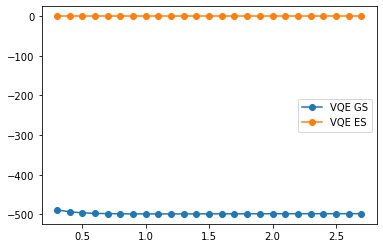

In [4]:
import matplotlib.pyplot as plt
R =  [0.3 + 0.1*i for i in range(len(energies_gs))]
plt.figure()
plt.plot(R, energies_gs, marker="o", label="VQE GS")
plt.plot(R, energies_es, marker="o", label="VQE ES")
plt.legend()
plt.show()

In [7]:
#Excited state calculations with VQE with different active space
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 {R}\nH 0.0 0.0 -{R}\nH {R} 0.0 0.0\nCl 0.0 1.78 0.0"
fci_gs = []
fci_es = []
energies_gs = []
energies_es = []
P0 = tq.paulis.Projector("|00>")
for R in [0.3 + 0.1*i for i in range(25)]:
    print("Optimizing point R={:2.1f}".format(R))
    active = {"A'": [1,2], 'A"': [1,2]}
    mol = tq.chemistry.Molecule(geometry=geomstring.format(R=R), basis_set="cc-pVDZ", active_orbitals=active)
    H = mol.make_hamiltonian()
    results = []
    for i in range(2):
        # labeling ensures that tequila can distinguish the variables
        # singles can break the symmetry here falling into different states than the two above
        # (i.e. the open-shell singly excited manifold: in jordan_wigner those states are build from
        #  |1001> and |0110>)
        U = mol.make_upccgsd_ansatz(name="2-UpCCGD", label=i) 
        E = tq.ExpectationValue(U, H)
        active_vars = E.extract_variables()
        angles = {angle: 0.0 for angle in active_vars}
        for data, U2 in results:
            S2 = tq.ExpectationValue(H=P0, U=U + U2.dagger())
            E -= data.energy * S2
            angles = {**angles, **data.angles}
        print("Starting to optimize state ", i)
        result = tq.optimizer_scipy.minimize(E, silent=True, method="bfgs", variables=active_vars, initial_values=angles)
        print("finished with energy {:2.8f}".format(result.energy))
        results.append((result, U))
    energies_gs.append(results[0][0].energy)
    energies_es.append(results[1][0].energy)

Optimizing point R=0.3
Starting to optimize state  0
finished with energy -488.67501243
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.4
Starting to optimize state  0
finished with energy -493.70142187
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.5
Starting to optimize state  0
finished with energy -496.21642875
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.6
Starting to optimize state  0
finished with energy -497.56507998
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.7
Starting to optimize state  0
finished with energy -498.30147078
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.8
Starting to optimize state  0
finished with energy -498.69815018
Starting to optimize state  1
finished with energy 0.00000000
Optimizing point R=0.9
Starting to optimize state  0
finished with energy -498.89953659
Starting to 

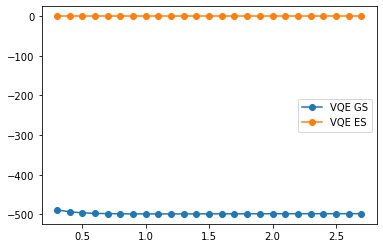

In [8]:
import matplotlib.pyplot as plt
R =  [0.3 + 0.1*i for i in range(len(energies_gs))]
plt.figure()
plt.plot(R, energies_gs, marker="o", label="VQE GS")
plt.plot(R, energies_es, marker="o", label="VQE ES")
plt.legend()
plt.show()